In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.drop(['Ticket', 'Cabin'], axis=1,inplace=True)
test.drop(['Ticket', 'Cabin'], axis=1,inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Gilinski, Mr. Eliezer",male,S
freq,1,577,644


In [6]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [7]:
#3>2>1 = 1st class > 2nd > 3rd

pclass_map = {1:3,2:2,3:1}
train['Pclass'] = train['Pclass'].map(pclass_map)
test['Pclass'] = test['Pclass'].map(pclass_map)

sex_map ={'female': 1, 'male': 0}
train['Sex'] = train['Sex'].map(sex_map) 
test['Sex'] = test['Sex'].map(sex_map)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,1,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,1,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,1,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [8]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [9]:
train.drop(['Name'], axis=1,inplace=True)
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'].value_counts()

test.drop(['Name'], axis=1,inplace=True)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [10]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)
# data_dummies = pd.get_dummies(train)
# data_dummies.head()


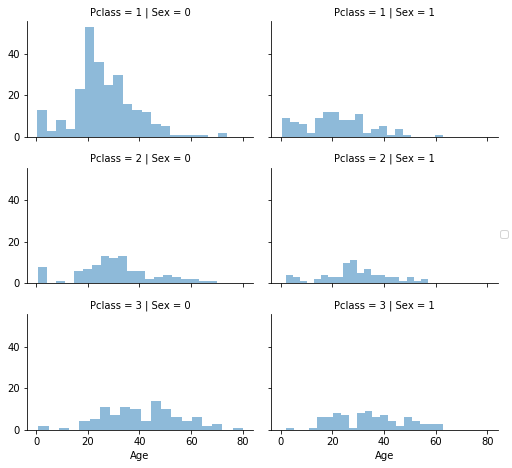

In [11]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [12]:
guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train[(train['Sex'] == i) & \
                              (train['Pclass'] == j+1)]['Age'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.mean()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Sex == i) & (train.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

for i in range(0, 2):
    for j in range(0, 3):
        test.loc[ (test.Age.isnull()) & (test.Sex == i) & (test.Pclass == j+1),\
                'Age'] = guess_ages[i,j]
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

train['Age'].isnull().any()

False

In [13]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [14]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] > 64, 'Age']
train.drop(['AgeBand','PassengerId'],axis=1,inplace=True)
train.head()

test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[test['Age'] > 64, 'Age']


81    67
96    76
Name: Age, dtype: int32

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [16]:
train['IsAlone'] = 0
test['IsAlone']=0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [17]:
freq_port = train.Embarked.dropna().mode()[0]
train['Embarked'] = train['Embarked'].fillna(freq_port)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [18]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train['FareBand'].head(5)

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
Name: FareBand, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [19]:
test.loc[test['Fare'].isnull(),'Fare'] = 0.0

In [20]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,1,0,1,1,0,0,0,1,2,0
1,1,3,1,2,1,0,3,1,3,2,0
2,1,1,1,1,0,0,1,0,2,1,1
3,1,3,1,2,1,0,3,0,3,2,0
4,0,1,0,2,0,0,1,0,1,1,1


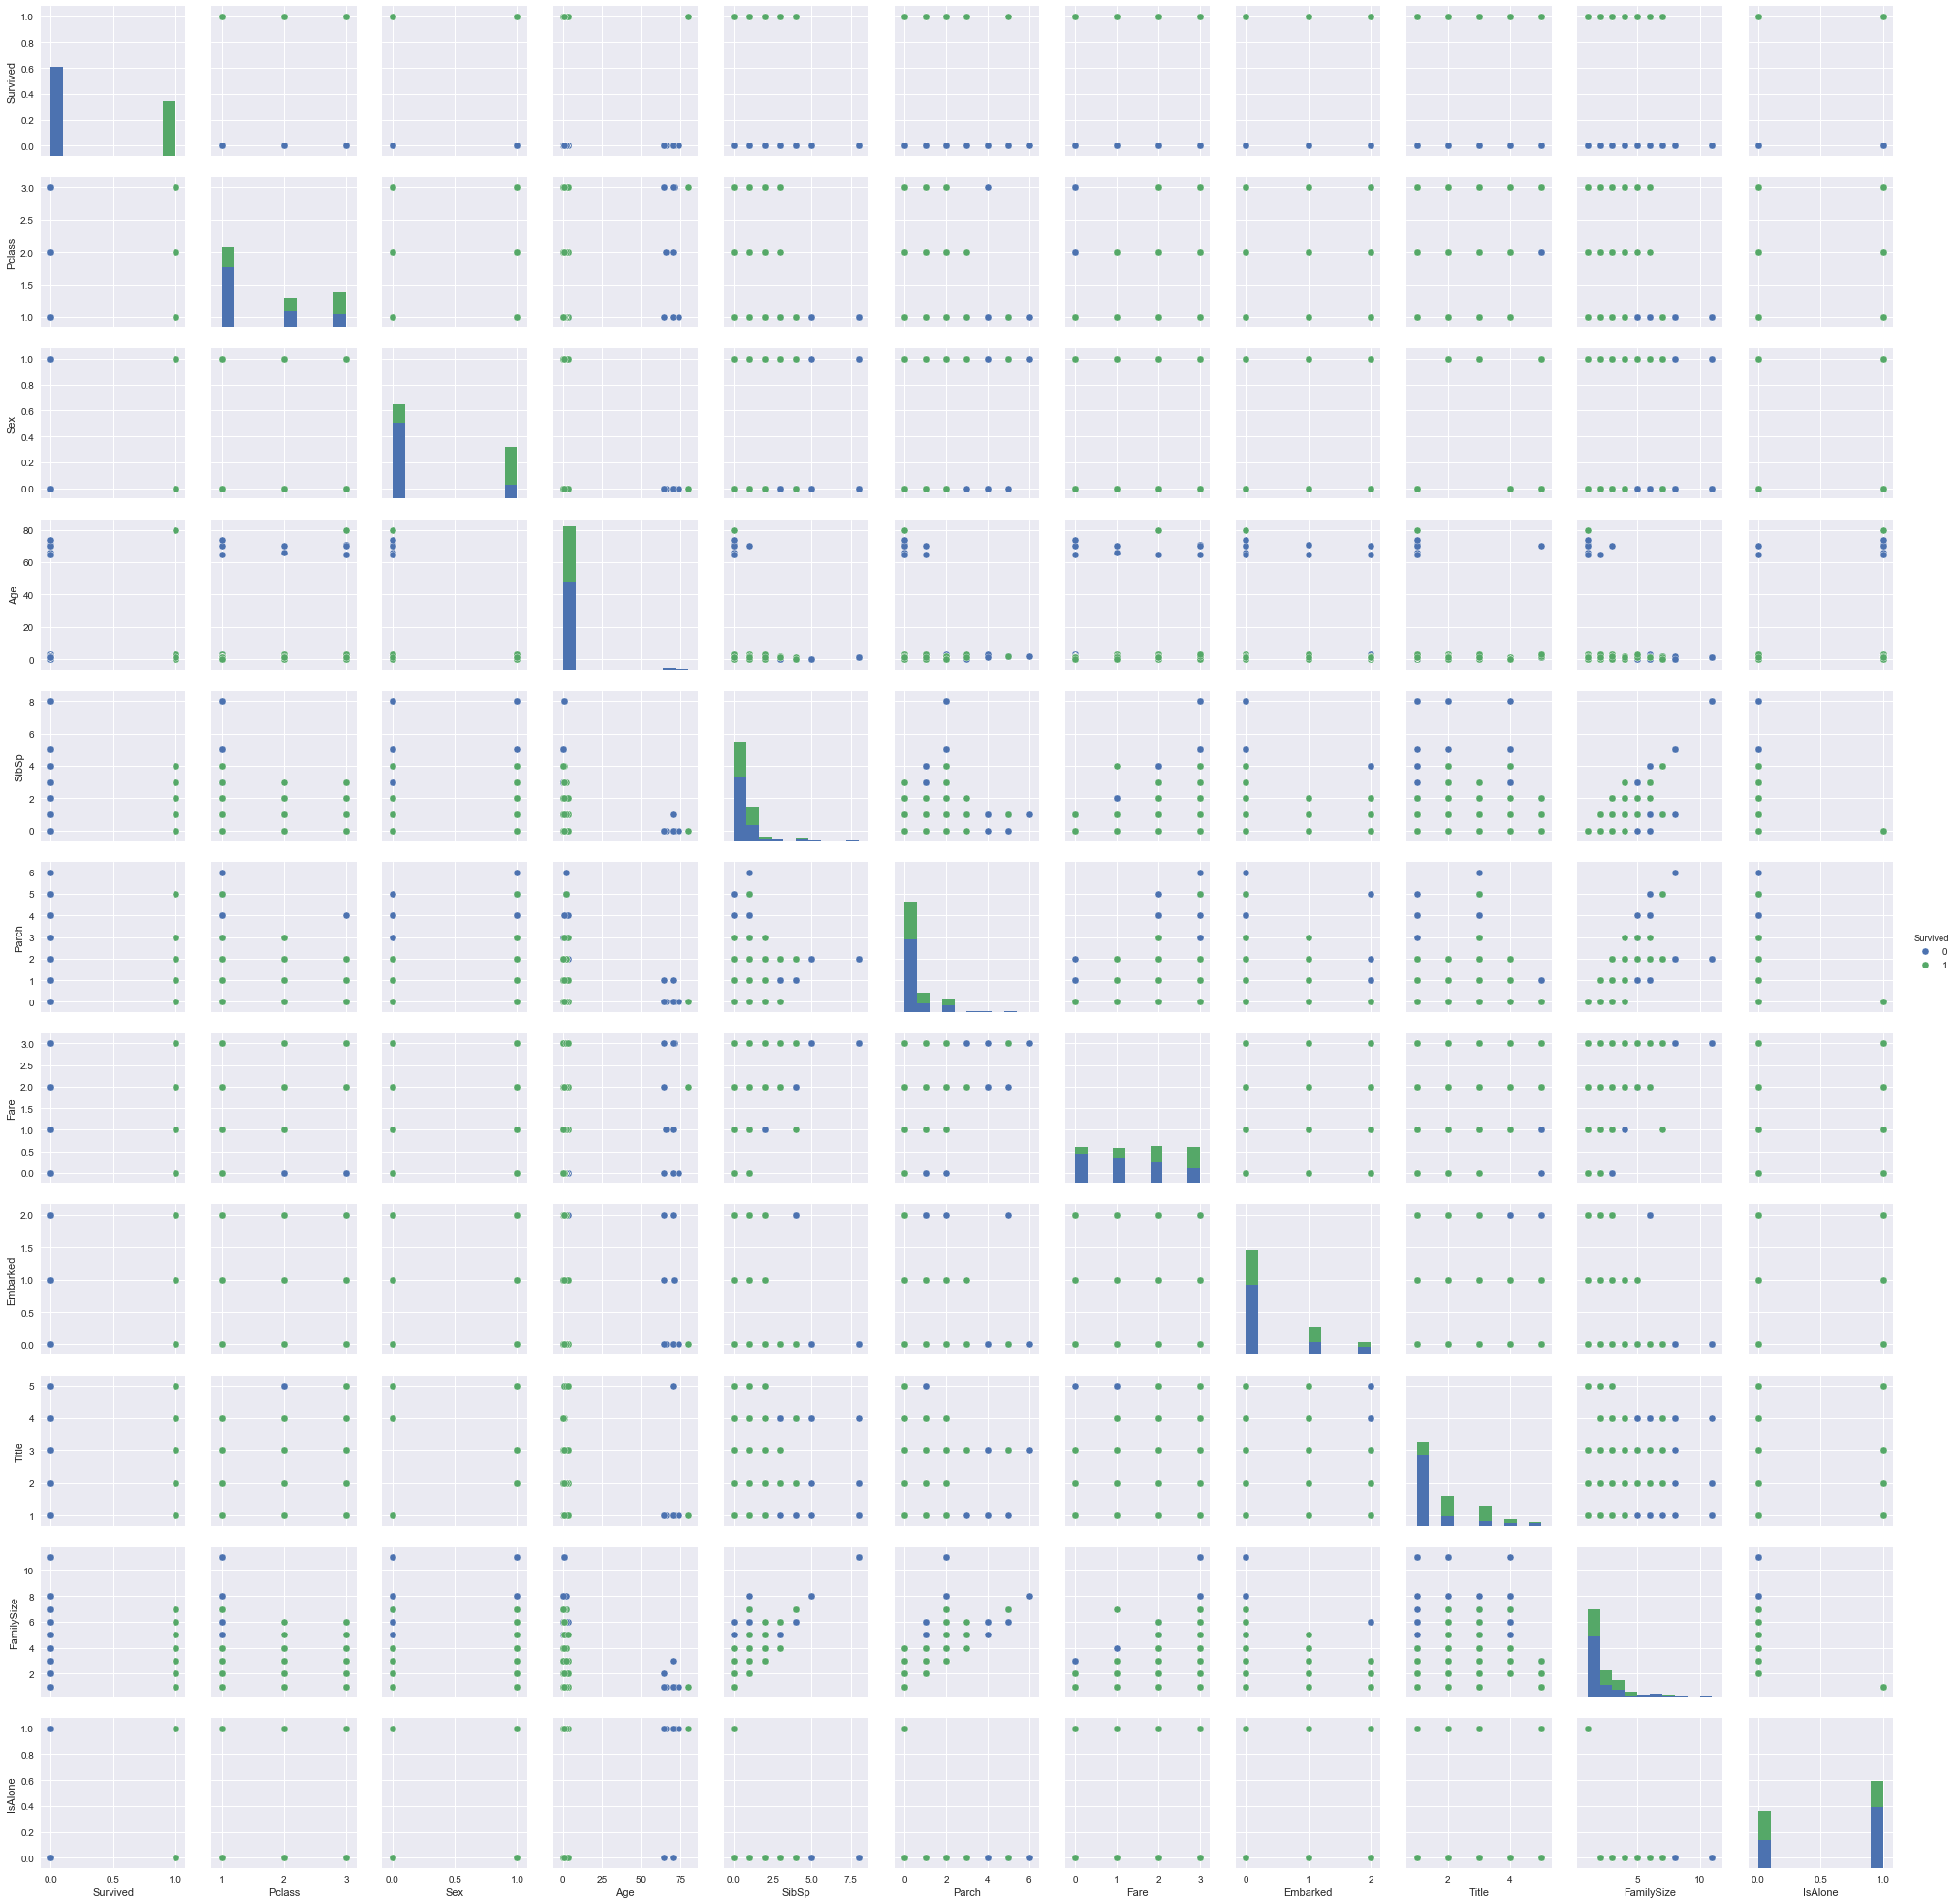

In [21]:
sns.set()
sns.pairplot(data=train,hue='Survived')

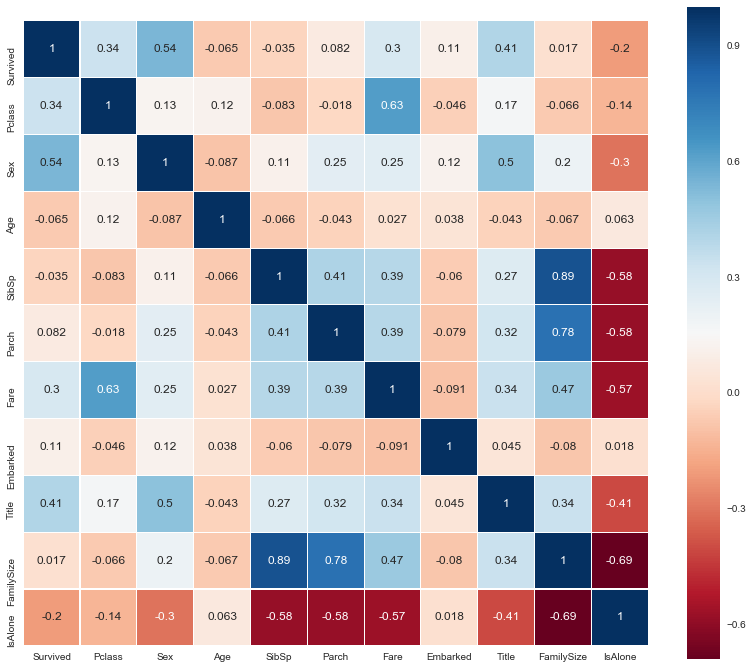

In [22]:
colormap= plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap,linecolor='white', annot=True)

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,1,0,1,1,0,0,0,1,2,0
1,1,3,1,2,1,0,3,1,3,2,0
2,1,1,1,1,0,0,1,0,2,1,1
3,1,3,1,2,1,0,3,0,3,2,0
4,0,1,0,2,0,0,1,0,1,1,1


In [24]:
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
FamilySize     False
IsAlone        False
dtype: bool

In [25]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop(['PassengerId'],axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [26]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth =6,min_samples_leaf= 2)
decision_tree.fit(X_train, Y_train)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=500,
                             warm_start=True, max_depth =6,min_samples_leaf= 2,max_features='sqrt', verbose=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
abc = AdaBoostClassifier(n_estimators= 500,learning_rate= 0.75)
abc.fit(X_train, Y_train)

gbc = GradientBoostingClassifier(n_estimators=500,max_depth= 5,
                                 min_samples_leaf=2,verbose= 0)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
dt = go.Scatter(
    y = decision_tree.feature_importances_,
    x = X_test.columns)

rf = go.Scatter(
    y = rfc.feature_importances_,
    x = X_test.columns)
ab = go.Scatter(
    y = abc.feature_importances_,
    x = X_test.columns)
gb = go.Scatter(
    y = gbc.feature_importances_,
    x = X_test.columns)
fig = go.Figure(data=[dt,rf,ab,gb])
py.iplot(fig)

In [29]:
test['Survived'] = Y_pred
inv_title_mapping = {v: k for k, v in title_mapping.items()} 
test['Title'] = test['Title'].map(inv_title_mapping)
test[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
1,Miss,0.936709
3,Mrs,0.930556
0,Master,0.714286
4,Rare,0.500000
2,Mr,0.000000


In [30]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [31]:
submission.to_csv("submission.csv",index = False)